# Solar Panel Detection

This notebook demonstrates how to use the geoai package for solar panel detection using a pre-trained model.

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/geoai/blob/main/docs/examples/solar_panel_detection.ipynb)

## Install package
To use the `geoai-py` package, ensure it is installed in your environment. Uncomment the command below if needed.

In [17]:
%pip install geoai-py

## Import libraries

In [18]:
import geoai
import requests

url = 'https://drive.google.com/uc?export=download&id=1QYEvDsiUyWYNRHk7rvoYdUwXl7EduzOA'
response = requests.get(url)

with open('downloaded_image.tif', 'wb') as f:
    f.write(response.content)

## Download sample data

In [19]:
# raster_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/solar_panels_davis_ca.tif"
# raster_path = geoai.download_file("https://drive.google.com/file/d/1QYEvDsiUyWYNRHk7rvoYdUwXl7EduzOA/view?usp=sharing")

File already exists: view?usp=sharing


===== RASTER INFORMATION: /content/downloaded_image.tif =====
Driver: GTiff
Dimensions: 1259 x 524 pixels
Number of bands: 3
Data type: float32
Coordinate Reference System: EPSG:4326
Georeferenced Bounds: BoundingBox(left=-48.013065474091775, bottom=-15.89101771301751, right=-47.89996757982113, top=-15.843945992129647)
Pixel Resolution: 8.983152841195215e-05, 8.983152841195215e-05
NoData Value: None

----- Band Statistics -----
Band 1:
  Min: 0.11
  Max: 0.81
  Mean: 0.20
  Std Dev: 0.06
Band 2:
  Min: 0.11
  Max: 0.74
  Mean: 0.18
  Std Dev: 0.04
Band 3:
  Min: 0.10
  Max: 0.67
  Mean: 0.16
  Std Dev: 0.04


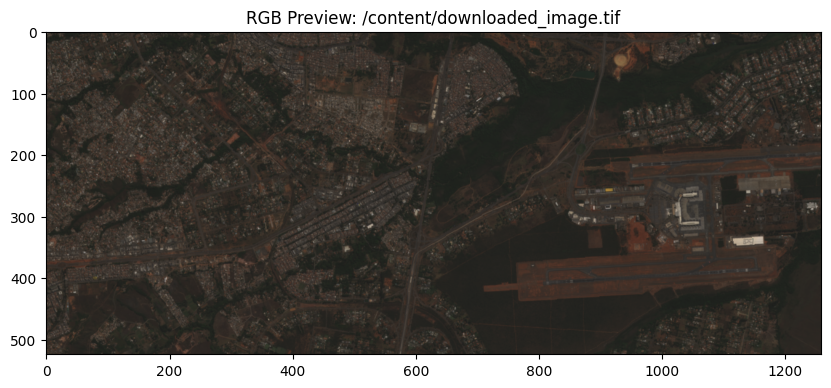

In [20]:
geoai.print_raster_info("/content/downloaded_image.tif")

## Visualize data

In [22]:
geoai.view_raster("/content/downloaded_image.tif")

## Initialize model

In [23]:
detector = geoai.SolarPanelDetector()

Model path not specified, downloading from Hugging Face...
Model downloaded to: /root/.cache/huggingface/hub/models--giswqs--geoai/snapshots/75788bf6253e967a91b9576b1620949a3b939820/solar_panel_detection.pth
Model loaded successfully


## Generate masks

In [24]:
output_path = "solar_panel_masks.tif"

In [25]:
masks_path = detector.generate_masks(
    "/content/downloaded_image.tif",
    output_path=output_path,
    confidence_threshold=0.4,
    mask_threshold=0.5,
    min_object_area=100,
    overlap=0.25,
    chip_size=(400, 400),
    batch_size=4,
    verbose=False,
)

Dataset initialized with 2 rows and 5 columns of chips
Image dimensions: 1259 x 524 pixels
Chip size: 400 x 400 pixels
Overlap: 25.0% (stride_x=300, stride_y=300)
CRS: EPSG:4326
Processing raster with 3 batches


100%|██████████| 3/3 [00:02<00:00,  1.20it/s]

Masks with confidence values saved to solar_panel_masks.tif


## Visualize masks

In [26]:
geoai.view_raster(
    output_path,
    indexes=[2],
    colormap="autumn",
    layer_name="Solar Panels",
    basemap="/content/downloaded_image.tif",
)

## Vectorize masks

In [ ]:
gdf = geoai.orthogonalize(
    input_path=masks_path, output_path="solar_panel_masks.geojson", epsilon=0.2
)

## Visualize initial results

In [ ]:
geoai.view_vector_interactive(gdf, tiles=raster_url)

## Calculate geometric properties

In [ ]:
gdf = geoai.add_geometric_properties(gdf)
gdf.head()

In [ ]:
print(len(gdf))

In [ ]:
geoai.view_vector_interactive(gdf, column="elongation", tiles=raster_url)

## Filter results

In [ ]:
gdf_filter = gdf[(gdf["elongation"] < 10) & (gdf["area_m2"] > 5)]
print(len(gdf_filter))

## Visualize final results

In [ ]:
geoai.view_vector_interactive(gdf_filter, column="area_m2", tiles=raster_url)

In [ ]:
geoai.view_vector_interactive(
    gdf_filter, style_kwds={"color": "red", "fillOpacity": 0}, tiles=raster_url
)

In [ ]:
gdf_filter["area_m2"].hist()

In [ ]:
gdf_filter["area_m2"].describe()

In [ ]:
gdf_filter["area_m2"].sum()

## Save results

In [ ]:
gdf_filter.to_file("solar_panels.geojson")

![image](https://github.com/user-attachments/assets/a38925dc-b840-42b0-a926-326ef99b181c)